### importing libraries

In [1]:
import matplotlib.pyplot as plt
from skimage import io, color
from PIL import ImageFont, ImageDraw, Image
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import cv2

## importing X and y

In [2]:
X_f = []
y_f = []
for i in range(2):
    X = pickle.load( open( "chars/X_"+str(i)+"0.p", "rb" ) )
    y = pickle.load( open( "chars/y_"+str(i)+"0.p", "rb" ) )
    X = np.array(X)
    y = np.array(y)
    print(len(X), len(y))
    print(X[0][0])
    print(X.shape)
    for i in range(len(X)):
        img = X[i]
        img = color.rgb2gray(img)
        X_f.append(img)
        y_f.append(y[i])
    del X, y

67 67
[[255 254 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 255 255]
 [255 255 255]
 [255 255 255]
 [253 255 255]
 [254 255 255]
 [252 252 252]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 254 254]
 [254 254 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [253 255 255]
 [250 255 255]
 [233 242 242]
 [176 183 186]
 [ 22  24  27]
 [  0   1   5]
 [  0   0   3]
 [  0   0   3]
 [  0   1   3]
 [113 125 127]
 [195 204 207]
 [227 233 236]
 [255 254 255]
 [254 254 254]
 [251 255 254]
 [252 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(67, 64, 64, 3)
49995 49995
[[255

In [3]:
X = np.array(X_f)
y = np.array(y_f)
del X_f, y_f
print(X.shape, y.shape)
#X = X[:,:,:,2]

(50062, 64, 64) (50062,)


## Visualizing few examples

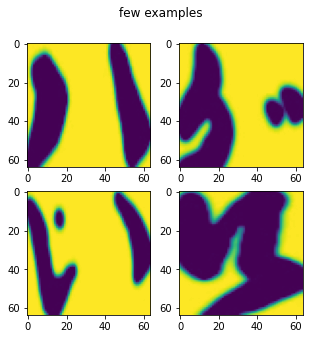

In [4]:
## importing X and y
fig = plt.figure(figsize=(5,5))
fig.suptitle('few examples')

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(X[0])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(X[1])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(X[2])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(X[3])

In [5]:
print(X.shape)

X= np.reshape(X, (X.shape[0], 64*64))
print(X.shape)

(50062, 64, 64)
(50062, 4096)


### Encoding the Dependent Variable

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:10])

[ 46  12   7  17  42  42  45 570  19  93]


In [7]:
print(len(np.unique(y)))
cat_num = len(np.unique(y))

571


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test = np.array(X_test)
y_test = np.array(y_test)

### Feature Scaling

In [9]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# X_train = np.reshape(X_train, (len(x_train), 64, 64, 1))
# X_test = np.reshape(X_test, (len(x_test), 64, 64, 1))

## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\nijao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

## Training the Random Forest Classification model on the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #61.5% f## Making the Confusion Matrixor Logistic reg with just 1000  
#random guesses will give 0.1855 %

[[ 11   0   0 ...   0   0   0]
 [  0  13   0 ...   0   0   0]
 [  0   0   5 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   2]
 [  0   0   0 ...   0   0   1]
 [  0   0   1 ...   0   0 138]]


0.60525

# Simple Autoencoder

In [10]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(4096,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(4096, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [11]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (64-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,
                epochs=4,
                batch_size=3,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/4
13350/13350 [==============================] - 141s 11ms/step - loss: 0.0173 - val_loss: 0.0137
Epoch 2/4
13350/13350 [==============================] - 98s 7ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 3/4
13350/13350 [==============================] - 102s 8ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 4/4
13350/13350 [==============================] - 108s 8ms/step - loss: 0.0133 - val_loss: 0.0133


In [13]:
# Encode and decode some letters
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [14]:
print(encoded_imgs.shape)

(10013, 64)


### Letters reconstruction

In [31]:
def prepare_img(Image): 
    im_color = Image
    im_gray = im_color#cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(im_gray, thresh=0, maxval=130, type=cv2.THRESH_BINARY)
    im_thresh_gray = cv2.bitwise_and(im_gray, mask)
    mask3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # 3 channel mask
    return im_thresh_gray

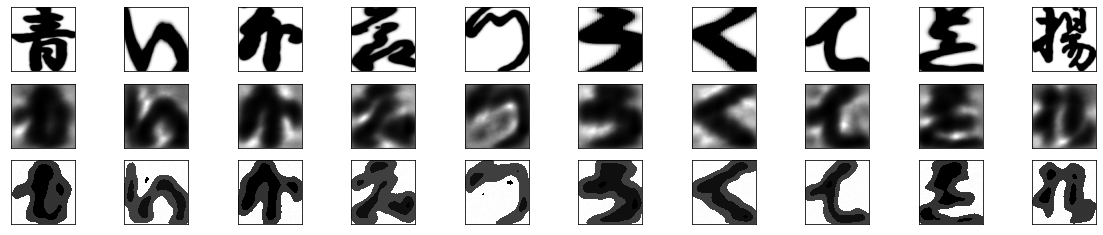

In [32]:
import matplotlib.pyplot as plt

n = 10  # How many letters we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    img = X_test[i].reshape(64, 64)
    #img = prepare_img(img)
    plt.imshow(img)
    plt.xlabel("original images")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    img = decoded_imgs[i].reshape(64, 64)
    plt.imshow(img)
    plt.xlabel("Display reconstructions")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Enhanced imgs reconstructed
    ax = plt.subplot(3, n, i + 11 + n)
    img = decoded_imgs[i].reshape(64, 64,1)
    #print(img.shape)
    plt.ylabel("Display Enhanced reconstructions")
    img = prepare_img(img)
    img = prepare_img(img)
    plt.imshow(img)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [28]:
pickle.dump( y, open( "chars/y_final.p", "wb" ) )

## Deep Autoencoder

In [16]:
import keras
from keras import layers

input_img = keras.Input(shape=(4096,))
encoded = layers.Dense(784, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='relu')(decoded)
decoded = layers.Dense(4096, activation='sigmoid')(decoded)

In [17]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=10,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
4000/4000 [==============================] - 220s 55ms/step - loss: 0.0169 - val_loss: 0.0138
Epoch 2/10
4000/4000 [==============================] - 211s 53ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 3/10
4000/4000 [==============================] - 197s 49ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 4/10
4000/4000 [==============================] - 254s 64ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 5/10
4000/4000 [==============================] - 268s 67ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 6/10
4000/4000 [==============================] - 242s 60ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 7/10
4000/4000 [==============================] - 256s 64ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 8/10
4000/4000 [==============================] - 279s 70ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 9/10
4000/4000 [==============================] - 254s 63ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 10/10
4000/4000 [==============================] 

### Letters reconstruction

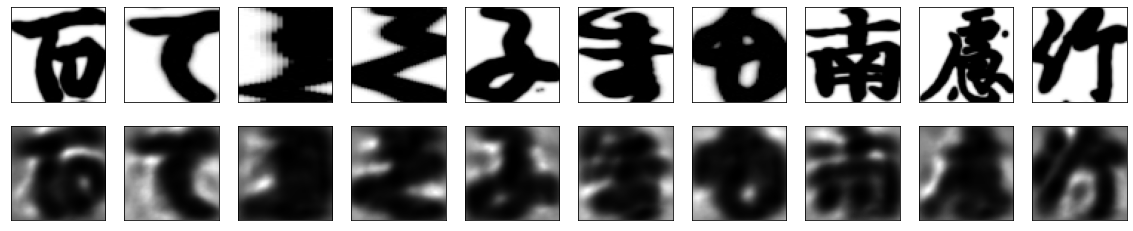

In [18]:
# Encode and decode some letters
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many letters we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()